In [1]:
import numpy as np
import pandas as pd
import tikzplotlib
import matplotlib.pyplot as plt

idx = pd.IndexSlice

Text(0, 0.5, 'Excess loss')

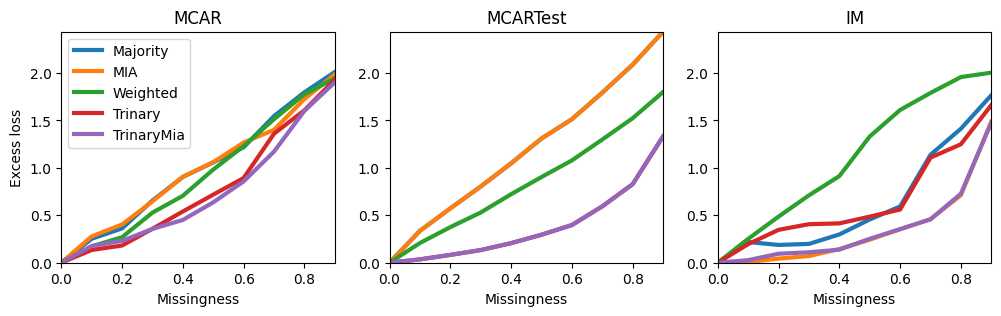

In [26]:
result_data_folder = (
        "/home/heza7322/PycharmProjects/missing-value-handling-in-carts/data/results"
    )
data_sets = [
    # Regression
    'auto_mpg',
    'black_friday',
    'cement',
    "life_expectancy",

    # Classification
    'titanic',
    "lymphography",
    'boston_housing',
    "seeds",

    # Remove
    #"wine_quality",
    #'iris',
    #'balance_scale',
    #"kr_vs_kp",
]

missingness_and_set = ['MCAR_all','MCAR_test','IM_all']

tree_types = ['Majority','MIA','Weighted','Trinary','TrinaryMia']
fig, axs = plt.subplots(1,3,figsize = (12,3))

for i,missing in enumerate(missingness_and_set):
    losses = {}
    excess_losses = {}
    for data_set in data_sets:
        losses[data_set] = pd.read_csv(f'{result_data_folder}/{missing}/{data_set}.csv',index_col=0)
        excess_losses[data_set] = losses[data_set]/losses[data_set].loc[0.0]-1
    losses_df = pd.concat(losses, names=["data_set", "missingness"])
    excess_losses_df = pd.concat(excess_losses, names=["data_set", "missingness"])
    mean_el_df = excess_losses_df.groupby('missingness').mean()

    if missing == 'MCAR_test':
        mean_el_df['TrinaryMia'] = mean_el_df['Trinary']
        mean_el_df['MIA'] = mean_el_df['Majority']
        y_max = mean_el_df.max().max()
    for j, tree_type in enumerate(tree_types):
        axs[i].plot(mean_el_df[tree_type],
                    #linestyle = linestyles[j],
                    label = tree_type,
                    linewidth = 3,
                    #color = (0.2,0.2,0.2)
                    )

axs[0].legend()

axs[0].set_title('MCAR')
axs[1].set_title('MCARTest')
axs[2].set_title('IM')

for i in range(3):
    axs[i].set_xlabel('Missingness')
    axs[i].set_xlim([0,0.9])
    axs[i].set_ylim([0,y_max])
axs[0].set_ylabel('Excess loss')

#tikzplotlib.save(f'{result_data_folder}/figures/results.tex', figure = fig)

In [35]:
missing = 'MCAR_all'

losses_df = pd.concat(losses, names=["data_set", "missingness"])
best_tree_types = losses_df.idxmin(axis=1)
n_best_sets = best_tree_types.groupby('missingness').value_counts().loc[0.1:].unstack(level=0).T


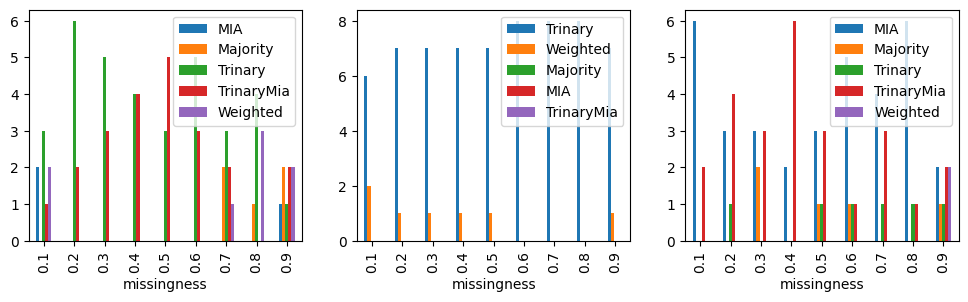

In [54]:
fig, axs = plt.subplots(1,3,figsize = (12,3))

for i, missing in enumerate(missingness_and_set):
    losses = {}
    for data_set in data_sets:
        losses[data_set] = pd.read_csv(f'{result_data_folder}/{missing}/{data_set}.csv',index_col=0)
    losses_df = pd.concat(losses, names=["data_set", "missingness"])
    best_tree_types = losses_df.idxmin(axis=1)
    n_best_sets = best_tree_types.groupby('missingness').value_counts().loc[0.1:].unstack(level=0).T
    for tree_type in tree_types:
        if tree_type not in n_best_sets.columns:
            n_best_sets[tree_type] = 0
    n_best_sets.plot.bar(ax = axs[i])

In [45]:
n_best_sets.index


Float64Index([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], dtype='float64', name='missingness')